# AlgoEvaluation Project - Machine Failure Prediction

Finding the best algorithm for the dataset

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df = df.rename(columns={"Air temperature [K]" : "Air Temperature", "Process temperature [K]" : "Process temperature", "Rotational speed [rpm]" : "Rotational speed", "Torque [Nm]" : "Torque", "Tool wear [min]" : "Tool wear"})

In [4]:
df.head()

,id,Product ID,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


## Target - Machine failure
1. 0 - Machine Failed
2. 1 - Machine is running

### Step 2 - Perform Basic Data Quality checks

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  object 
 2   Type                 136429 non-null  object 
 3   Air Temperature      136429 non-null  float64
 4   Process temperature  136429 non-null  float64
 5   Rotational speed     136429 non-null  int64  
 6   Torque               136429 non-null  float64
 7   Tool wear            136429 non-null  int64  
 8   Machine failure      136429 non-null  int64  
 9   TWF                  136429 non-null  int64  
 10  HDF                  136429 non-null  int64  
 11  PWF                  136429 non-null  int64  
 12  OSF                  136429 non-null  int64  
 13  RNF                  136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 14.6+ MB


In [6]:
df.isna().sum()

id                     0
Product ID             0
Type                   0
Air Temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Machine failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seperate X and Y (Machine failure)
Drop "id" & "Product ID" columns as it is statistically insignificant

In [8]:
X = df.drop(columns=["id", "Product ID", "Machine failure"])
Y = df[["Machine failure"]]

In [9]:
X.columns

Index(['Type', 'Air Temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [10]:
Y.columns

Index(['Machine failure'], dtype='object')

In [11]:
X.head()

,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [12]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [13]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

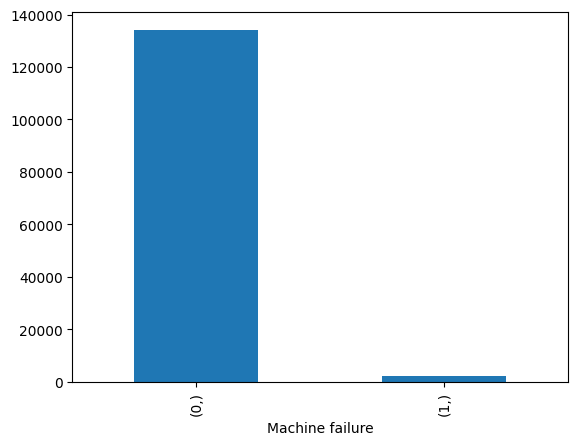

In [14]:
Y.value_counts().plot(kind="bar")

### Step 4 - Apply Preprocessing on X

In [15]:
X.dtypes

Type                    object
Air Temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
dtype: object

In [16]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [17]:
cat

['Type']

In [18]:
con

['Air Temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [21]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [22]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [23]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air Temperature,num__Process temperature,num__Rotational speed,num__Torque,num__Tool wear,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Step 5 - Apply Train Test split on X

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=46)

In [25]:
xtrain.head()

,num__Air Temperature,num__Process temperature,num__Rotational speed,num__Torque,num__Tool wear,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
102593,1.953144,1.558605,-1.119615,0.511792,0.962890,-0.03945,13.884927,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
8119,-0.785493,-0.751584,0.509376,-0.758468,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
66103,1.308759,0.981058,0.725614,-0.382095,0.478249,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
22959,1.040265,0.620091,-0.355575,0.500030,-0.193996,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
18888,1.255061,1.197638,1.417575,-1.570023,-0.881874,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [26]:
ytrain.head()

,Machine failure
102593,1
8119,0
66103,0
22959,0
18888,0


In [27]:
xtest.head()

,num__Air Temperature,num__Process temperature,num__Rotational speed,num__Torque,num__Tool wear,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
95012,-0.248505,-0.895971,0.134564,0.276559,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
57214,-1.429878,-1.184745,0.004821,-0.605566,0.087409,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
48778,2.329036,2.208346,-1.011497,0.888165,-1.272714,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
49391,0.932868,0.547897,-0.024010,0.029564,-0.053293,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
108521,-0.516999,0.186930,0.740030,-0.370333,-0.788072,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [28]:
ytest.head()

,Machine failure
95012,0
57214,0
48778,0
49391,0
108521,0


In [29]:
xtrain.shape

(109143, 13)

In [30]:
xtest.shape

(27286, 13)

### Step 6 - Algorithm Evaluation
SVM and KNN are suitable for smaller datasets upto 1000 rows. Hence, we skip SVM and KNN for this dataset

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [32]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

In [33]:
models[0].__class__.__name__

'LogisticRegression'

In [34]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [35]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest):

    # Fit the model 
    model.fit(xtrain, ytrain)

    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Calculated f1_macro for train and test
    f1_train = f1_score(ytrain, ypred_train, average="macro")
    f1_test = f1_score(ytest, ypred_test, average="macro")

    # 5 fold crossvalidaton on train data
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro", n_jobs=-1)
    f1_cv = scores.mean()

    # Create a dictionary for final results
    res = {
        "model_name": model.__class__.__name__,
        "model": model,
        "f1 train": f1_train,
        "f1 test": f1_test,
        "f1 cv": f1_cv
    }

    return res

In [36]:
def algo_evaluation(models: list, xtrain, ytrain, xtest, ytest):

    # Intialize blank list for results
    results = []

    # Apply for loop on models
    for model in models:
        r = evaluate_single_model(model, xtrain, ytrain, xtest, ytest)
        print(r)
        results.append(r)

    # Save the results in dataframe
    res_df = pd.DataFrame(results)

    # Sort the results
    sort_df = res_df.sort_values(by="f1 cv", ascending=False).reset_index(drop=True)

    # Get the best model
    best_model = sort_df.loc[0, "model"]
    
    return sort_df.round(4), best_model

In [37]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [38]:
res_df, best_model = algo_evaluation(models, xtrain, ytrain, xtest, ytest)

c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model_name': 'LogisticRegression', 'model': LogisticRegression(), 'f1 train': np.float64(0.9294023752402543), 'f1 test': np.float64(0.9353787523348498), 'f1 cv': np.float64(0.9290114868734118)}
{'model_name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1 train': np.float64(0.997754665664774), 'f1 test': np.float64(0.8665202611872194), 'f1 cv': np.float64(0.8730345828840733)}


c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1 train': np.float64(0.9977572678214096), 'f1 test': np.float64(0.9310757380149639), 'f1 cv': np.float64(0.9265639611496596)}


c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'model_name': 'GradientBoostingClassifier', 'model': GradientBoostingClassifier(), 'f1 train': np.float64(0.9353448715482588), 'f1 test': np.float64(0.9334805661155503), 'f1 cv': np.float64(0.9281272830149788)}
{'model_name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=

In [39]:
res_df

,model_name,model,f1 train,f1 test,f1 cv
0,LogisticRegression,LogisticRegression(),0.9294,0.9354,0.9290
1,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.9353,0.9335,0.9281
2,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9978,0.9311,0.9266
3,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9455,0.9291,0.9253
4,DecisionTreeClassifier,DecisionTreeClassifier(),0.9978,0.8665,0.8730


In [40]:
best_model

LogisticRegression()

## Evaluate the best model

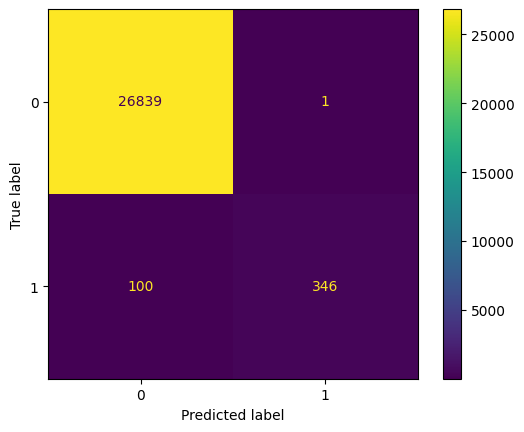

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [42]:
ypred_test = best_model.predict(xtest)
ypred_test[0:5]

array([0, 0, 0, 0, 0])

In [43]:
ytest.head()

,Machine failure
95012,0
57214,0
48778,0
49391,0
108521,0


In [44]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26840
           1       1.00      0.78      0.87       446

    accuracy                           1.00     27286
   macro avg       1.00      0.89      0.94     27286
weighted avg       1.00      1.00      1.00     27286



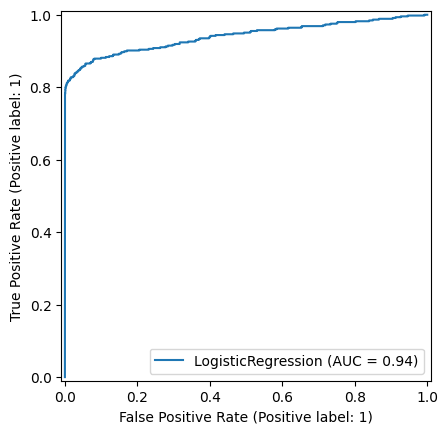

In [45]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [46]:
roc_scores = cross_val_score(best_model, xtrain, ytrain, cv=5, scoring="roc_auc")

roc_scores

c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chandan\Desktop\ETLHIVE\7_Machine Learning\Machine-Learning\repository\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Chandan\Deskt

array([0.92573704, 0.92764099, 0.94427984, 0.92680716, 0.94227161])

In [47]:
roc_scores.mean()

np.float64(0.9333473281327672)

### Above metrics confirm that Logistic Regression is best model here and can be used for Out of Sample prediction.

### Step 8 - Out of sample prediction

In [48]:
xnew = pd.read_csv("test_machine.csv")
xnew.head()


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [49]:
xnew = xnew.rename(columns={"Air temperature [K]" : "Air Temperature", "Process temperature [K]" : "Process temperature", "Rotational speed [rpm]" : "Rotational speed", "Torque [Nm]" : "Torque", "Tool wear [min]" : "Tool wear"})
xnew.head()

,id,Product ID,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [50]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air Temperature', 'Process temperature',
                                  'Rotational speed', 'Torque', 'Tool wear',
                                  'TWF', 'HDF', 'PWF', 'OSF', 'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [51]:
xnew.head()

,id,Product ID,Type,Air Temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [52]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air Temperature,num__Process temperature,num__Rotational speed,num__Torque,num__Tool wear,num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [53]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0])

In [54]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs

array([0.00223424, 0.00104206, 0.0027765 , ..., 0.003417  , 0.00273024,
       0.00219248])

In [55]:
res = xnew[["id"]]
res

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [56]:
res["Machine_Failure_Prediction"] = preds
res["probs"] = probs

C:\Users\Chandan\AppData\Local\Temp\ipykernel_40068\1456343108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Machine_Failure_Prediction"] = preds
C:\Users\Chandan\AppData\Local\Temp\ipykernel_40068\1456343108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["probs"] = probs


In [57]:
res = res.round(4)
res

,id,Machine_Failure_Prediction,probs
0,136429,0,0.0022
1,136430,0,0.0010
2,136431,0,0.0028
3,136432,0,0.0033
4,136433,0,0.0035
...,...,...,...
90949,227378,0,0.0024
90950,227379,0,0.0005
90951,227380,0,0.0034
90952,227381,0,0.0027


In [58]:
res["Machine_Failure_Prediction"].value_counts()

Machine_Failure_Prediction
0    89850
1     1104
Name: count, dtype: int64

<Axes: xlabel='Machine_Failure_Prediction'>

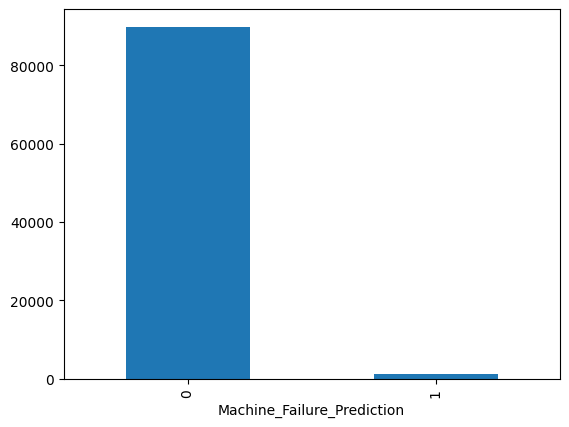

In [59]:
res["Machine_Failure_Prediction"].value_counts().plot(kind="bar")

In [60]:
res.to_csv("LogisticResults.csv", index=False)

In [61]:
import joblib 

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [62]:
joblib.dump(best_model, "machine_logistic.joblib")

['machine_logistic.joblib']

In [63]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Air Temperature', 'Process temperature',
                                  'Rotational speed', 'Torque', 'Tool wear',
                                  'TWF', 'HDF', 'PWF', 'OSF', 'RNF']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [64]:
m = joblib.load("machine_logistic.joblib")
m

LogisticRegression()